<a href="https://colab.research.google.com/github/geral98atehortua/Mujeres_Digitales/blob/main/Taller_semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un fanático de pokemones le pide analizar los datos de pokemones, para esto se le proporciona un conjunto de datos en archivo csv. Este fanático le pide a usted como analista investigar cuales son los pokemones con mayor ataque.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as num

In [20]:
df = pd.read_csv('pokemon_data.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Ejercicio 1:

Calcule el promedio y la mediana del ataque de: 
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

**1.1 promedio y la mediana del ataque de todos los pokemones**


In [25]:
df['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [91]:
dfpok=df['Attack'].mean()
round(dfpok)

79

In [27]:
dfpok=df['Attack'].median()
dfpok

75.0

**1.2. promedio y la mediana del ataque de los pokemones agrupados por legendary**





In [28]:
df['clasificacion of legendary']=num.where(df['Legendary']==True,'Legendario','No Legendario')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,clasificacion of legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,No Legendario
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,No Legendario
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,No Legendario
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,No Legendario
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,No Legendario
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,Legendario
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,Legendario
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,Legendario
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,Legendario


In [29]:
dflg=df[['clasificacion of legendary','Attack']].groupby('clasificacion of legendary').mean()
round(dflg,4)

,Attack
clasificacion of legendary,
Legendario,116.6769
No Legendario,75.6694


In [30]:
dflg=df[['clasificacion of legendary','Attack']].groupby('clasificacion of legendary').median()
round(dflg,4)

,Attack
clasificacion of legendary,
Legendario,110
No Legendario,72


**1.3. Promedio y Ataque de los pokemones agrupados por tipo**

In [31]:
dfty=df[['Type 1','Attack']].groupby('Type 1').mean()
round(dfty,4)

,Attack
Type 1,
Bug,70.9710
Dark,88.3871
Dragon,112.1250
Electric,69.0909
Fairy,61.5294
Fighting,96.7778
Fire,84.7692
Flying,78.7500
Ghost,73.7812


In [81]:
dftu=df[['Type 1','Attack']].groupby('Type 1').median()
round(dftu,4)

,Attack
Type 1,
Bug,65.0
Dark,88.0
Dragon,113.5
Electric,65.0
Fairy,52.0
Fighting,100.0
Fire,84.5
Flying,85.0
Ghost,66.0


## Ejercicio 2:

Grafique el ataque de los pokemones con un grafico boxplot para los siguientes casos:
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

**2.1. Grafico Todos los pokemones**

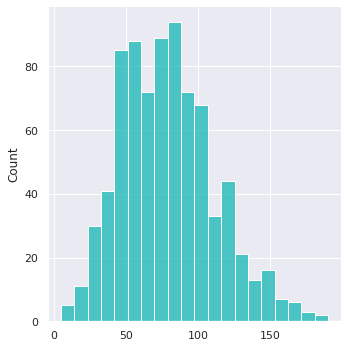

In [104]:
sns.set(rc={'figure.figsize':(13,7)})
tdate=df['Attack'].values
sns.displot(tdate, color='#15B7B5')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Median:  75.0


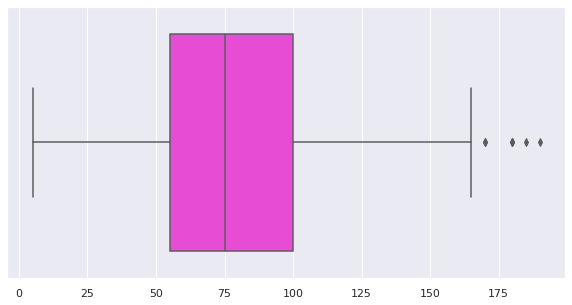

In [62]:
sns.set(rc={'figure.figsize':(10,5)})
gdata = df['Attack'].values
sns.boxplot(gdata, color='#FF33E7')
print(f'Median:  {df["Attack"].median()}')

**2.2 Grafico pokemones Legendarios y no Legendarios**

In [34]:
import plotly.express as px
fig = px.box(df, x='clasificacion of legendary', y='Attack', points='all',width=1250)
fig.show()

**2.3 POKEMONES AGRUPADOS POR TIPOS**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

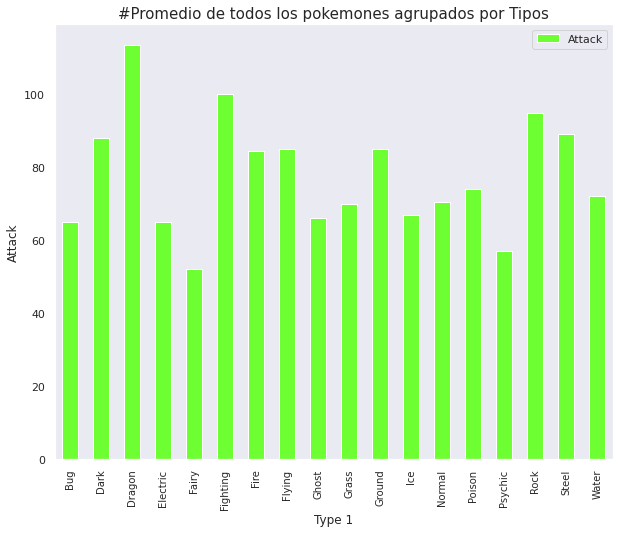

In [80]:
sns.set(rc={'figure.figsize':(10,8)})
dfty.plot(kind='bar',legend='Reverse', linewidth =1,color="#6EFF33")
plt.ylabel('Attack',fontsize=12)
plt.xlabel('Type 1',fontsize=12)
plt.grid()
plt.title("#Promedio de todos los pokemones agrupados por Tipos",fontsize=15)
plt.xticks(rotation=90,fontsize=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

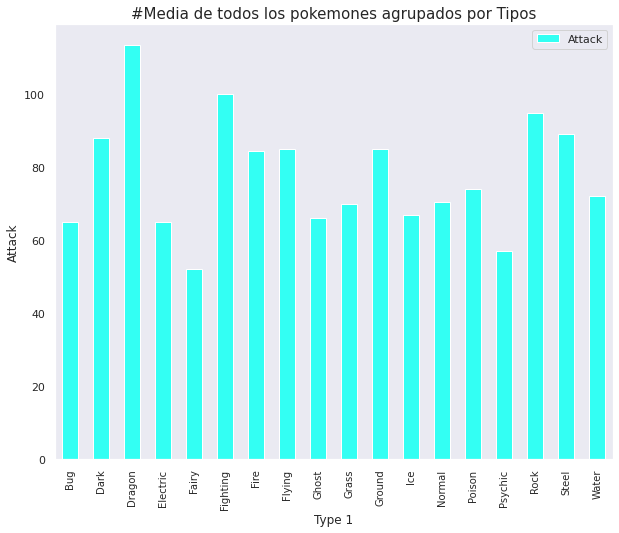

In [86]:
sns.set(rc={'figure.figsize':(10,8)})
dftu.plot(kind='bar',legend='Reverse', linewidth =1,color="#33FFF3")
plt.ylabel('Attack',fontsize=12)
plt.xlabel('Type 1',fontsize=12)
plt.grid()
plt.title("#Media de todos los pokemones agrupados por Tipos",fontsize=15)
plt.xticks(rotation=90,fontsize=10)

## Ejercicio 3:

Realice las siguientes pruebas de hipótesis:
1. El promedio del ataque de los pokemones es mayor a 77
2. El promedio del ataque de los pokemones legendarios es diferente a los no legendarios


Y determine con un nivel de significancia del 5% (es decir $\alpha$ = 0.05), si podemos rechazar o no las 3 hipótesis anteriores. 

**SOLUCIÓN 3.1**

In [35]:
df['Attack'].mean()

79.00125

In [41]:
α = 0.05

In [46]:
stats.ttest_1samp(df['Attack'], popmean=77)

Ttest_1sampResult(statistic=1.7439461372672926, pvalue=0.08155305645189834)

In [47]:
T,p=stats.ttest_1samp(df['Attack'], popmean=77)

In [48]:
p<α

False

In [49]:
p>α

True

**Ya que P > α tenemos que retener $H_0$ y afirmamos que la diferencia no es estadísticamente significativa.**


**Aplicamos la alternativa unilateral,Ha:μ>μ0  o  Ha:μ<μ0 .**



In [52]:
T,p = stats.ttest_1samp(df['Attack'], popmean=77)
p_value = p/2
p_value

0.04077652822594917

In [53]:
p_value<α

True

In [54]:
p_value>α

False

**Podemos observar que ahora p_value<α por lo tanto debemos rechazar $H_0$ y debemos afirmar que la diferencia observada es estadisticamente significativa.**

**SOLUCIÓN 3.2**

In [55]:
dflg=df[['clasificacion of legendary','Attack']].groupby('clasificacion of legendary').mean()
round(dflg,4)

,Attack
clasificacion of legendary,
Legendario,116.6769
No Legendario,75.6694


In [60]:
legendario=df[df['clasificacion of legendary']=='Legendario'].Attack
nlegendario=df[df['clasificacion of legendary']=='No Legendario'].Attack
statistic,pvaluele =stats.ttest_ind(legendario,nlegendario,equal_var=False)
statistic,pvaluele

(10.438133539322203, 2.520372449236646e-16)

ya que al realizar la prueba de test, el valor de P(2.5203724q49236646e-16)  es muy pequeño, se rechaza la hipotesis nula.